# **Análisis del Test de Alfabetización en IA con CTT y IRT**

**Para CCT**

Paquetes

*   psych
*   cct



**Para IRT**
Usando los paquetes mirt y ggmirt

Guia:
https://philippmasur.de/2022/05/13/how-to-run-irt-analyses-in-r/

https://github.com/masurp/ggmirt



**#################### **

**CARGA Y ANÁLISIS GENERAL DE LOS DATOS**

**#################### **

In [ ]:
install.packages("readxl")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Cargar las librerías necesarias
library(readxl)

# URL del archivo Excel
#url <- 
# "https://github.com/ravellom/
#AI_Lit_Test_Analysis/raw/main/correcto_217_0_9.xlsx"
url <- "correcto_0_10.xlsx"

### IMPORTANTE Los datos son dicotómicos [0,1]
### Han sido procesados en python con el siguinete código: 
#https://github.com/ravellom/AI_Lit_Test_Analysis

# Ruta temporal para guardar el archivo descargado
temp_file <- tempfile(fileext = ".xlsx")

# Descargar el archivo
download.file(url, temp_file, mode = "wb") 
# El 'mode = "wb"' es importante para archivos binarios como .xlsx

# Leer el archivo descargado
df <- read_xlsx(temp_file)

# Cuando ya no necesites el archivo, puedes eliminar el archivo temporal
unlink(temp_file)

# Aislar solo los items

data <- df[7:36]

head(data)

In [ ]:
any(is.na(data))

[1] FALSE

In [ ]:
sapply(data, table, useNA = "ifany")

,Item01,Item02,Item03,Item04,Item05,Item06,Item07,Item08,Item09,Item10,⋯,Item21,Item22,Item23,Item24,Item25,Item26,Item27,Item28,Item29,Item30
0,159,150,191,145,86,54,169,189,138,154,⋯,63,122,99,129,136,149,161,110,212,141
1,58,67,26,72,131,163,48,28,79,63,⋯,154,95,118,88,81,68,56,107,5,76


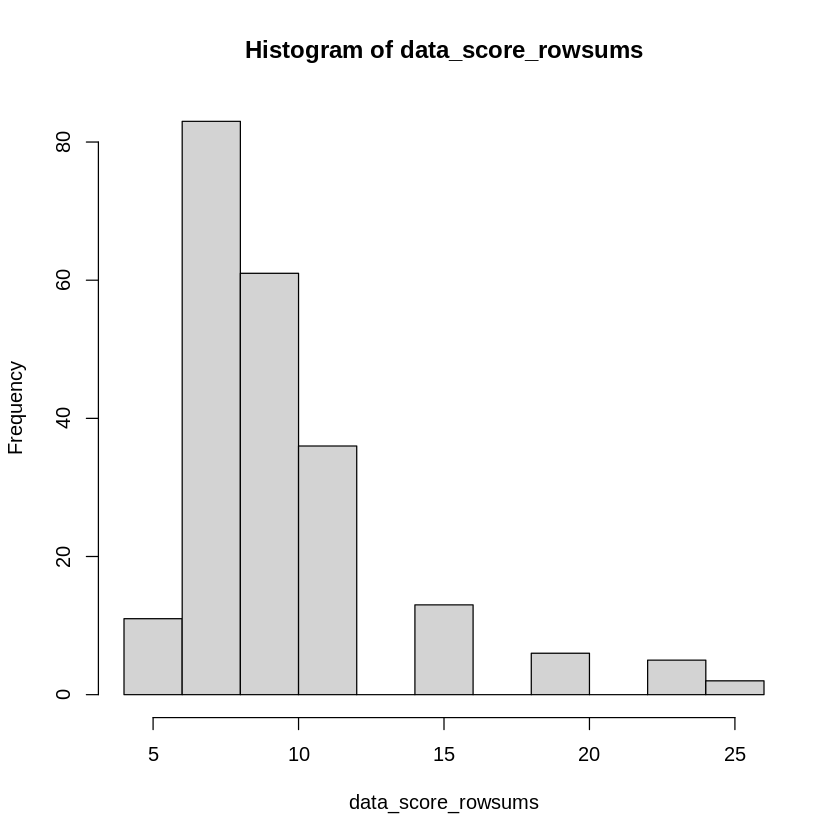

In [ ]:
data_score_rowsums <- rowSums(data)
hist(data_score_rowsums)

**#################### **

# **CCT**

# Teoría clásica de los test

**#################### **

In [ ]:
install.packages("psych")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(psych)
alfa <- psych::alpha(data)
alfa

ERROR: Error in library(psych): there is no package called ‘psych’


In [ ]:
install.packages("CTT")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(CTT)


Attaching package: ‘CTT’


The following objects are masked from ‘package:psych’:

    polyserial, reliability




In [ ]:
## Ejecutamos el código con estos parámetros y asignamos el resultado a la variable data_ctt.

data2 <- as.data.frame(data)

data_ctt <- itemAnalysis(items = data2, hardFlag=.25, pBisFlag=.3)

data_ctt


 Number of Items 
 30 

 Number of Examinees 
 260 

 Coefficient Alpha 
 0.663 

In [ ]:
data_ctt$itemReport

itemName,itemMean,pBis,bis,alphaIfDeleted,hard,lowPBis
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Item01,0.49344978,0.30682790,0.38457058,0.5469056,,
Item02,0.50655022,0.30033409,0.37643140,0.5478277,,
Item03,0.08733624,-0.19861093,-0.35311245,0.5948020,X,X
Item04,0.18340611,0.15302344,0.22305411,0.5679097,X,X
Item05,0.69432314,0.28196189,0.37047737,0.5515781,,X
Item06,0.81659389,0.16459785,0.23992550,0.5666937,,X
Item07,0.14847162,-0.03223767,-0.04949977,0.5855505,X,X
Item08,0.11353712,-0.11669936,-0.19248460,0.5909242,X,X
Item09,0.24890830,0.21009290,0.28652713,0.5611471,X,X


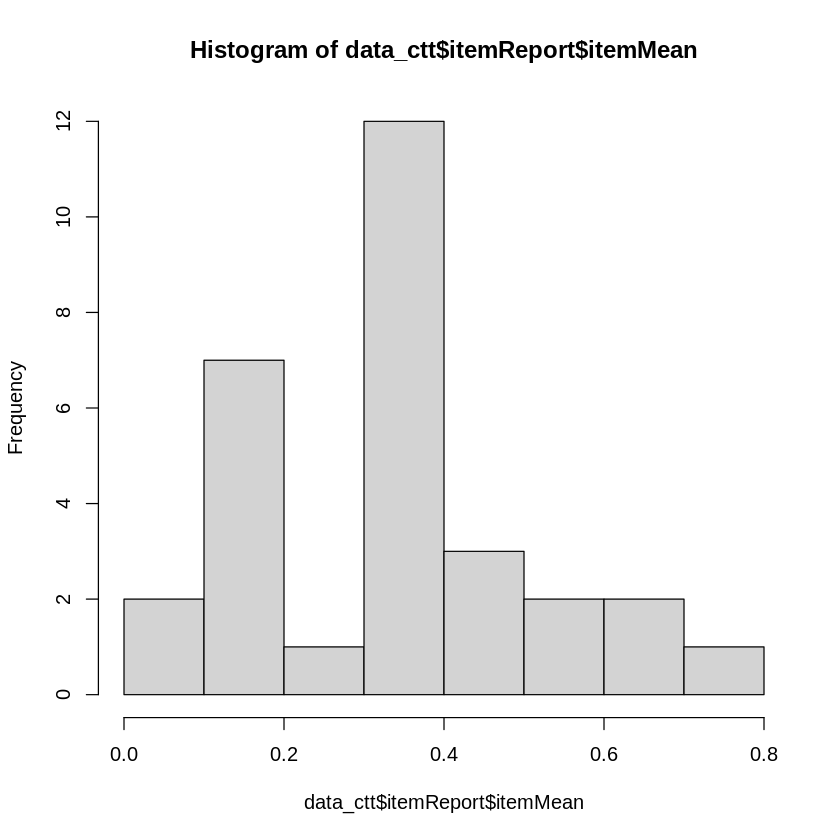

In [ ]:
hist(data_ctt$itemReport$itemMean)

**#################### **

# **IRT**

# Item Response Theory

**#################### **

# Test the two essential assumptions of IRT: Unidimensionality and Local independence

**Unidimensionality**

In [ ]:
install.packages("lavaan")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘pbivnorm’, ‘numDeriv’, ‘quadprog’




In [ ]:
library(lavaan)

This is lavaan 0.6-17
lavaan is FREE software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov




In [ ]:
# Especificar el modelo con variables desde Item01 hasta Item30
model <- '
Factor1 =~ Item01 + Item02 + Item03 + Item04 + Item05 + Item06 + Item07 + Item08 + Item09 + Item10
          + Item11 + Item12 + Item13 + Item14 + Item15 + Item16 + Item17 + Item18 + Item19 + Item20
          + Item21 + Item22 + Item23 + Item24 + Item25 + Item26 + Item27 + Item28 + Item29 + Item30'


In [ ]:

# Ajustar el modelo CFA a los datos
fit <- cfa(model, data=data, mimic =c("MPlus"), std.lv = TRUE, ordered = TRUE)
# Mostrar el resumen de los resultados
#summary(fit, fit.measures=TRUE)

In [ ]:
fitMeasures(fit, c("chisq.scaled", "df", "pvalue.scaled"))

chisq.scaled            df pvalue.scaled 
     1060.985       405.000         0.000

In [ ]:
fitMeasures(fit, c("rmsea.scaled", "rmsea.ci.lower.scaled", "rmsea.ci.upper.scaled", "rmsea.pvalue.scaled"))

rmsea.scaled rmsea.ci.lower.scaled rmsea.ci.upper.scaled 
                0.079                 0.073                 0.085 
  rmsea.pvalue.scaled 
                0.000

In [ ]:
fitMeasures(fit, c("cfi.scaled", "srmr"))

cfi.scaled       srmr 
     0.193      0.219

In [ ]:
install.packages("semPlot")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘checkmate’, ‘htmlwidgets’, ‘coda’, ‘htmlTable’, ‘viridis’, ‘Formula’, ‘arm’, ‘minqa’, ‘nloptr’, ‘xtable’, ‘openxlsx’, ‘RUnit’, ‘mvtnorm’, ‘Hmisc’, ‘jpeg’, ‘png’, ‘reshape2’, ‘glasso’, ‘fdrtool’, ‘gtools’, ‘abind’, ‘mi’, ‘lme4’, ‘carData’, ‘kutils’, ‘RcppParallel’, ‘RcppEigen’, ‘StanHeaders’, ‘BH’, ‘rpf’, ‘qgraph’, ‘sem’, ‘plyr’, ‘XML’, ‘igraph’, ‘lisrelToR’, ‘rockchalk’, ‘corpcor’, ‘OpenMx’




Warning message in qgraph::qgraph(Edgelist, labels = nLab, bidirectional = Bidir, :
“The following arguments are not documented and likely not arguments of qgraph and thus ignored: lavOptions”


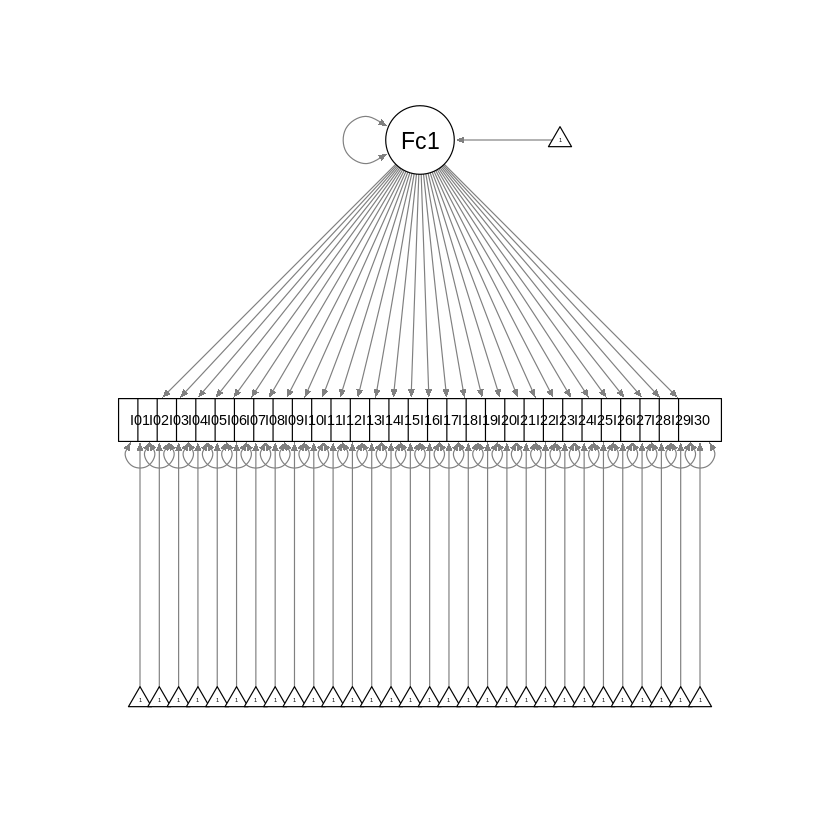

In [ ]:
#plot(fit)

library(semPlot)

semPaths(fit, fix = TRUE, residuals = TRUE, lavOptions = list("fa.sd"))  # Adjust options as needed


In [ ]:
# Asumiendo que 'fit' es tu modelo ajustado
residuals <- lavResiduals(fit, type = "cor")$cov
# residuals

In [ ]:
# Obtener el número de ítems
n_items <- ncol(residuals)

# Inicializar una matriz para guardar los resultados
q3_statistics <- matrix(NA, nrow = n_items, ncol = n_items)

# Calcular correlaciones de residuos para cada par de ítems
for (i in 1:(n_items-1)) {
  for (j in (i+1):n_items) {
    q3_statistics[i, j] <- residuals[i, j]
  }
}

# Identificar pares de ítems con correlaciones de residuos mayores a 0.2
violations <- which(q3_statistics > 0.2, arr.ind = TRUE)

# Si necesitas los nombres de los ítems que violan la independencia local
if(length(violations) > 0){
  item_names <- rownames(residuals)
  violating_pairs <- apply(violations, 1, function(idx) item_names[idx])
  print(violating_pairs)
} else {
  print("No violations found")
}


     [,1]     [,2]     [,3]     [,4]     [,5]     [,6]     [,7]     [,8]    
[1,] "Item03" "Item03" "Item03" "Item01" "Item03" "Item04" "Item03" "Item05"
[2,] "Item04" "Item05" "Item06" "Item07" "Item07" "Item10" "Item11" "Item13"
     [,9]     [,10]    [,11]    [,12]    [,13]    [,14]    [,15]    [,16]   
[1,] "Item06" "Item11" "Item04" "Item10" "Item01" "Item04" "Item08" "Item03"
[2,] "Item13" "Item14" "Item15" "Item15" "Item16" "Item16" "Item16" "Item17"
     [,17]    [,18]    [,19]    [,20]    [,21]    [,22]    [,23]    [,24]   
[1,] "Item06" "Item07" "Item10" "Item15" "Item11" "Item12" "Item06" "Item15"
[2,] "Item17" "Item17" "Item17" "Item17" "Item18" "Item18" "Item19" "Item19"
     [,25]    [,26]    [,27]    [,28]    [,29]    [,30]    [,31]    [,32]   
[1,] "Item17" "Item05" "Item06" "Item08" "Item06" "Item11" "Item14" "Item18"
[2,] "Item19" "Item20" "Item20" "Item20" "Item21" "Item22" "Item22" "Item22"
     [,33]    [,34]    [,35]    [,36]    [,37]    [,38]    [,39]    [,40]   

**IRT**

In [ ]:
install.packages("mirt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘permute’, ‘GPArotation’, ‘gridExtra’, ‘Rcpp’, ‘vegan’, ‘Deriv’, ‘pbapply’, ‘dcurver’, ‘RcppArmadillo’




In [ ]:
install.packages("shiny")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘httpuv’, ‘xtable’, ‘sourcetools’, ‘later’, ‘promises’




In [ ]:
# Si quiero usar la Shiny App
library(mirt)
itemplot(shiny = TRUE)

Loading required package: shiny


Listening on http://127.0.0.1:6240



In [ ]:


# install.packages("devtools")
devtools::install_github("masurp/ggmirt")



tidyselect (1.2.0 -> 1.2.1) [CRAN]
isoband    (0.2.6 -> 0.2.7) [CRAN]
ggplot2    (3.4.4 -> 3.5.0) [CRAN]


Installing 3 packages: tidyselect, isoband, ggplot2

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpHjNsjS/remotesf15a7b20dc/masurp-ggmirt-4cfa106/DESCRIPTION’ ... OK
* preparing ‘ggmirt’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted ‘LazyData’ from DESCRIPTION
* building ‘ggmirt_0.1.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Instalar paquetes para evitar error posterior

install.packages("cowplot")

In [ ]:
# Data wrangling
library(tidyverse)

# Very comprehensive package for IRT analyses
library(mirt)

# Extension for 'mirt'
# devtools::install_github("masurp/ggmirt")
library(ggmirt)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: stats4

Loading required package: lattice



In [ ]:
##  Fitting the model

unimodel <- 'F1 = 1-30'

fit3PL <- mirt(data,
               #model = unimodel,  # alternatively, we could also just specify model = 1 in this case
               model = 1,  # alternatively, we could also just specify model = 1 in this case
               itemtype = "3PL",
               verbose = FALSE)
fit3PL


Call:
mirt(data = data, model = 1, itemtype = "3PL", verbose = FALSE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 87 EM iterations.
mirt version: 1.41 
M-step optimizer: BFGS 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Log-likelihood = -4078.885
Estimated parameters: 90 
AIC = 8337.771
BIC = 8658.232; SABIC = 8372.897
G2 (1073741733) = 6037.28, p = 1
RMSEA = 0, CFI = NaN, TLI = NaN

In [ ]:
##  Understanding IRT parameter

# Factor solution
summary(fit3PL)

            F1       h2
Item01  0.8829 0.779450
Item02  0.4186 0.175256
Item03 -0.5793 0.335579
Item04  0.4060 0.164818
Item05  0.9992 0.998454
Item06 -0.0342 0.001167
Item07  0.9905 0.981119
Item08  0.9986 0.997110
Item09  0.8242 0.679382
Item10  0.0177 0.000313
Item11  0.9996 0.999229
Item12  0.7085 0.501904
Item13  0.9996 0.999146
Item14  0.9995 0.998964
Item15  0.9995 0.999034
Item16  0.6204 0.384857
Item17  0.9986 0.997104
Item18  0.9990 0.997954
Item19  0.9993 0.998611
Item20  0.9988 0.997633
Item21  0.3639 0.132418
Item22  0.9988 0.997667
Item23  0.9565 0.914847
Item24  0.9992 0.998342
Item25  0.9995 0.998907
Item26  0.9985 0.996943
Item27  0.8329 0.693711
Item28  0.9996 0.999155
Item29 -0.9966 0.993114
Item30  0.9993 0.998614

SS loadings:  22.711 
Proportion Var:  0.757 

Factor correlations: 

   F1
F1  1


In [ ]:

params3PL <- coef(fit3PL, IRTpars = TRUE, simplify = TRUE)
round(params3PL$items, 2) # g = c = guessing parameter

,a,b,g,u
Item01,5.58,1.30,0.12,1
Item02,3.43,1.12,0.21,1
Item03,0.25,7.34,0.00,1
Item04,1.00,6.41,0.31,1
Item05,40.05,0.14,0.35,1
Item06,2.12,-0.94,0.00,1
Item07,22.47,1.87,0.18,1
Item08,29.69,1.93,0.16,1
Item09,32.43,1.01,0.22,1
Item10,-0.04,-18.80,0.01,1


In [ ]:
## Model fit, person fit, and item fit evaluation

M2(fit3PL)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,1868.536,375,0,0.1240059,0.1182091,0.1293853,0.1274517,0.1573972,0.2736183


In [ ]:
itemfit(fit3PL)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Item01,53.025045,6,0.17395588,1.159743e-09
Item02,39.501862,6,0.14682803,5.706007e-07
Item03,43.645387,8,0.13116163,6.638055e-07
Item04,91.784297,9,0.18845291,7.134789e-16
Item05,16.564852,5,0.09450073,5.403466e-03
Item06,46.770853,5,0.17959812,6.326564e-09
Item07,24.695777,7,0.09879522,8.589949e-04
Item08,35.428687,7,0.12522167,9.289184e-06
Item09,17.053044,5,0.09647471,4.400289e-03


In [ ]:
itemfit(fit3PL, fit_stats = "infit") # typical for Rasch modeling

item,outfit,z.outfit,infit,z.infit
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Item01,1.0068505597,0.10916588,1.0533101866,0.329382250
Item02,0.9149714938,-0.51392389,0.9738366031,-0.171356299
Item03,0.9613020011,-0.02467107,1.0233141965,0.175759799
Item04,0.9408784613,-0.34825138,0.9690228588,-0.214222599
Item05,0.9542615372,-0.70519337,0.9997978689,0.009052738
Item06,0.9998428893,0.04773905,0.9999546724,0.048427060
Item07,0.9697561555,-0.06069610,0.9788482816,-0.049923033
Item08,0.9832484805,0.01911732,0.9981858996,0.078958731
Item09,0.5927853856,-0.93441190,0.8148500983,-0.935625215


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?
`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


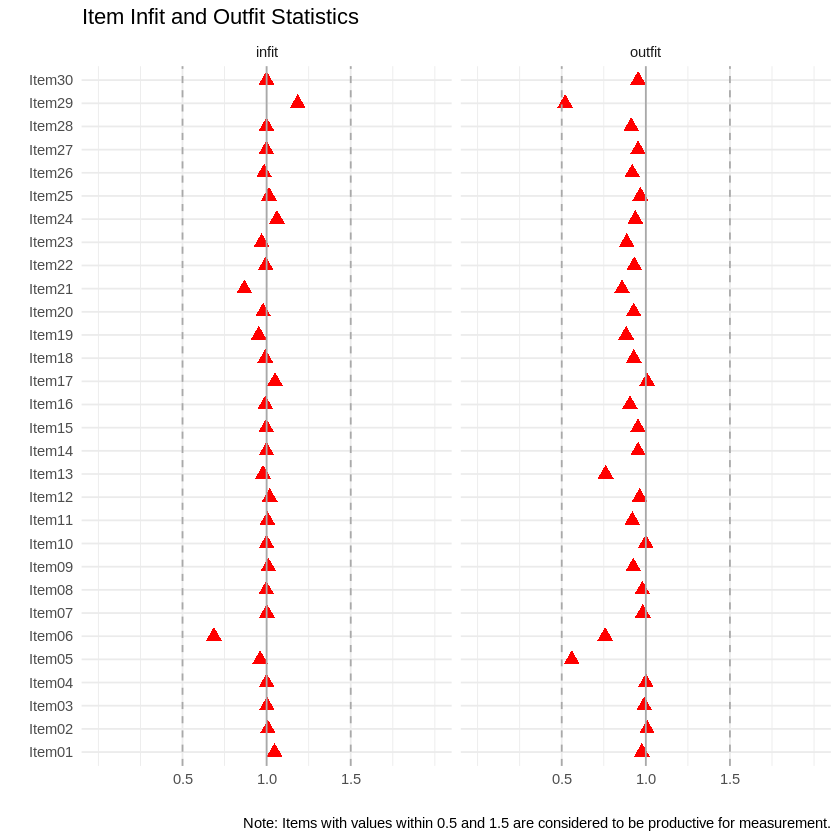

In [ ]:
itemfitPlot(fit3PL)

In [ ]:
## Assessing person fit

head(personfit(fit3PL))

,outfit,z.outfit,infit,z.infit,Zh
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9784080,0.03559323,1.0931524,0.4912634,-0.33504974
2,0.7764436,-0.26266786,1.0224429,0.1756379,-0.02662041
3,0.7894674,-0.63665645,0.8477201,-0.6797823,0.66101331
4,0.8934036,-0.31755857,1.0131643,0.1325376,0.02827422
5,0.6517948,-1.13394003,0.8236585,-0.7944436,0.89777786
6,0.6458428,-1.16087727,0.8147078,-0.8419699,0.93493041


In [ ]:
personfit(fit3PL) %>%
  reframe(infit.outside = prop.table(table(z.infit > 1.96 | z.infit < -1.96)),
            outfit.outside = prop.table(table(z.outfit > 1.96 | z.outfit < -1.96))) # lower row = non-fitting people

infit.outside,outfit.outside
<table[1d]>,<table[1d]>
0.98461538,0.92307692
0.01538462,0.07692308


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


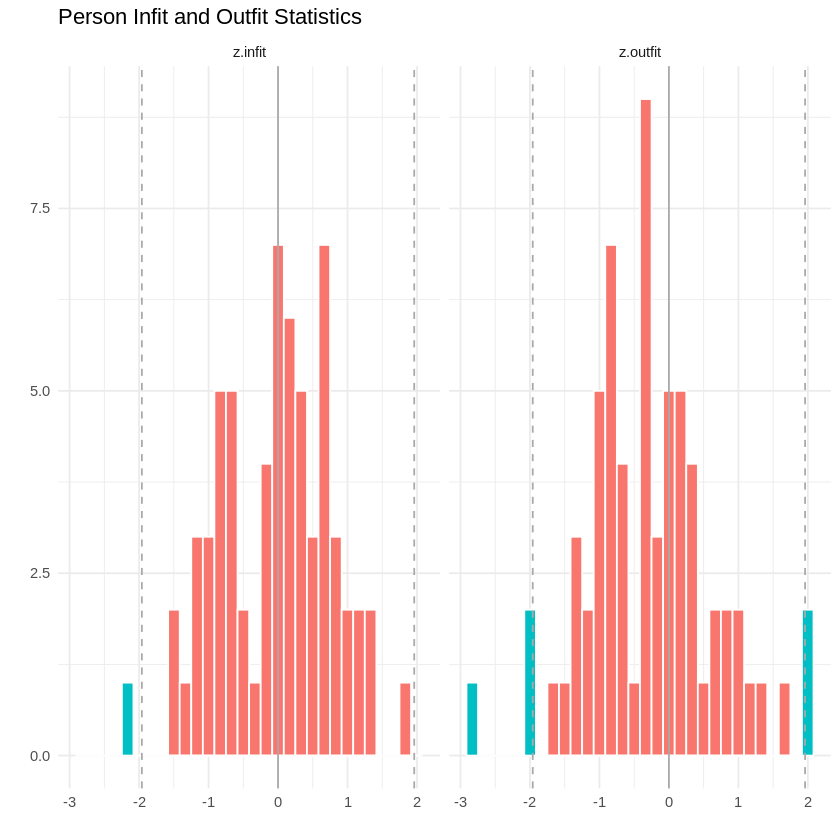

In [ ]:
personfitPlot(fit3PL)

**Typical IRT plots**

In [ ]:
## Item Person Map (Wright Map)

itempersonMap(fit3PL)

ERROR: Error in loadNamespace(x): there is no package called ‘cowplot’


In [ ]:
##  Item Characteristics Curves (Trace Plots)

tracePlot(fit3PL)

In [ ]:
tracePlot(fit3PL, facet = F, legend = T) + scale_color_brewer(palette = "Set3")

In [ ]:
# Plotting only individual items
tracePlot(fit3PL,items = c(1:3), facet = F, legend = T) + scale_color_brewer(palette = "Set2")

In [ ]:
### Item Information Curves

#itemInfoPlot(fit3PL) + scale_color_brewer(palette = "Set3")
itemInfoPlot(fit3PL)

In [ ]:
itemInfoPlot(fit3PL, facet = T)

In [ ]:
##  Test Information Curves

testInfoPlot(fit3PL, adj_factor = 2)

In [ ]:
## Scale Characteristic Curves

scaleCharPlot(fit3PL)

In [ ]:
score <- fscores(fit3PL)
sumscore <- rowSums(data)
cor.test(score, sumscore)